### Convert NetCDF to geotiff

Sources:  
https://corteva.github.io/rioxarray/stable/examples/convert_to_raster.html  
https://help.marine.copernicus.eu/en/articles/5029956-how-to-convert-netcdf-to-geotiff  
https://docs.xarray.dev/en/stable/user-guide/plotting.html

In [37]:
import xarray as xr
import rioxarray as rio
import matplotlib.pyplot as plt

In [38]:
xr.__version__

'2022.6.0'

In [39]:
# import cartopy.crs as ccrs

In [40]:
nc_file = xr.open_dataset('/home/data/mydata/adaptor.cams_regional_fc.retrieve-1681205269.7229848-14957-4-30219693-1eb5-42fc-97b2-cf233810bda5.nc')
nc_file

<xarray.Dataset>
Dimensions:     (longitude: 3, latitude: 2, level: 1, time: 32)
Coordinates:
  * longitude   (longitude) float32 13.35 13.45 13.55
  * latitude    (latitude) float32 52.55 52.45
  * level       (level) float32 0.0
  * time        (time) timedelta64[ns] 0 days 1 days 2 days ... 30 days 31 days
Data variables:
    pm2p5_conc  (time, level, latitude, longitude) float32 ...
Attributes:
    title:        PM25 Air Pollutant ANALYSIS at the Surface
    institution:  Data produced by Meteo France
    source:       Data from ENSEMBLE model
    history:      Model ENSEMBLE ANALYSIS
    ANALYSIS:     Europe, 20221201-20230101+[0H_0H]
    summary:      ENSEMBLE model hourly ANALYSIS of PM25 concentration at the...
    project:      MACC-RAQ (http://macc-raq.gmes-atmosphere.eu)

In [41]:
nc_file.coords['longitude']

<xarray.DataArray 'longitude' (longitude: 3)>
array([13.35, 13.45, 13.55], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 13.35 13.45 13.55
Attributes:
    long_name:  longitude
    units:      degrees_east

In [42]:
nc_file.variables['longitude'].to_numpy(), nc_file.variables['longitude'].to_numpy().shape

(array([13.35, 13.45, 13.55], dtype=float32), (3,))

In [43]:
nc_file.keys()

KeysView(<xarray.Dataset>
Dimensions:     (longitude: 3, latitude: 2, level: 1, time: 32)
Coordinates:
  * longitude   (longitude) float32 13.35 13.45 13.55
  * latitude    (latitude) float32 52.55 52.45
  * level       (level) float32 0.0
  * time        (time) timedelta64[ns] 0 days 1 days 2 days ... 30 days 31 days
Data variables:
    pm2p5_conc  (time, level, latitude, longitude) float32 32.06 31.48 ... 17.51
Attributes:
    title:        PM25 Air Pollutant ANALYSIS at the Surface
    institution:  Data produced by Meteo France
    source:       Data from ENSEMBLE model
    history:      Model ENSEMBLE ANALYSIS
    ANALYSIS:     Europe, 20221201-20230101+[0H_0H]
    summary:      ENSEMBLE model hourly ANALYSIS of PM25 concentration at the...
    project:      MACC-RAQ (http://macc-raq.gmes-atmosphere.eu))

In [44]:
var_keys = [key for key in nc_file.keys()]
var_keys

['pm2p5_conc']

In [45]:
blue = nc_file[var_keys[0]]
blue

<xarray.DataArray 'pm2p5_conc' (time: 32, level: 1, latitude: 2, longitude: 3)>
array([[[[32.05998 , 31.477875, 30.967222],
         [32.642128, 31.589302, 30.62231 ]]],


       [[[25.673899, 25.26278 , 24.965332],
         [26.751223, 26.192738, 25.45805 ]]],


       [[[25.794094, 25.608444, 25.307457],
         [26.673347, 26.545109, 25.964823]]],


       [[[37.304085, 37.76159 , 37.585434],
         [38.033245, 37.75926 , 37.757782]]],


       [[[35.136654, 34.61574 , 33.989697],
         [36.95863 , 36.511127, 36.2019  ]]],


       [[[15.315436, 15.66167 , 16.091234],
         [14.604126, 15.120321, 15.48969 ]]],


       [[[ 8.102471,  7.905794,  7.651135],
         [ 8.244523,  7.928858,  7.680239]]],


       [[[ 8.074672,  8.218422,  8.870039],
         [ 7.689373,  7.846715,  8.112984]]],


       [[[12.832705, 12.576456, 13.477886],
         [13.083428, 12.977358, 12.84929 ]]],


       [[[13.24027 , 13.194611, 13.290675],
         [13.643275, 13.722686, 13.204984]]],


       [[[15.149723, 14.496393, 14.670859],
         [17.028185, 16.877138, 15.312238]]],


       [[[15.487963, 15.270536, 14.931942],
         [15.51792 , 15.545204, 15.352391]]],


       [[[14.635848, 13.645778, 13.064291],
         [15.099754, 13.909858, 12.946362]]],


       [[[21.762537, 21.51538 , 19.738157],
         [22.08901 , 21.276716, 20.160341]]],


       [[[46.199898, 46.361332, 44.945072],
         [47.62376 , 46.872147, 45.021824]]],


       [[[39.968426, 37.545334, 32.172607],
         [39.69386 , 36.33886 , 32.232037]]],


       [[[43.585945, 43.65029 , 46.445934],
         [45.239944, 45.609226, 47.26522 ]]],


       [[[23.13914 , 21.864313, 22.340832],
         [22.144756, 22.134254, 22.353863]]],


       [[[22.826021, 22.633158, 22.790628],
         [22.596636, 22.269943, 21.766111]]],


       [[[15.988945, 16.138983, 16.370934],
         [15.748838, 15.985308, 16.112637]]],


       [[[18.469126, 18.731104, 18.703564],
         [18.81418 , 18.78823 , 18.834373]]],


       [[[14.785156, 14.686731, 14.33168 ],
         [13.800173, 14.390038, 12.996208]]],


       [[[13.020377, 12.805679, 12.863887],
         [13.406259, 13.172647, 12.782402]]],


       [[[ 7.826941,  7.617729,  7.440491],
         [ 8.018106,  7.996277,  8.000768]]],


       [[[10.229902, 10.476205, 10.173001],
         [10.044024, 10.223451,  9.567704]]],


       [[[ 8.910814,  8.691199,  9.030725],
         [ 8.07783 ,  8.155791,  8.006265]]],


       [[[ 5.266862,  5.296677,  5.121983],
         [ 5.12852 ,  5.233665,  5.085972]]],


       [[[ 7.681732,  7.998236,  8.047406],
         [ 7.378501,  7.516972,  7.376824]]],


       [[[ 5.002803,  5.111715,  4.881556],
         [ 4.585942,  4.671292,  4.469441]]],


       [[[ 3.759917,  3.692842,  4.09319 ],
         [ 3.628111,  3.822601,  3.887928]]],


       [[[ 3.74223 ,  4.04647 ,  3.656339],
         [ 3.383576,  3.839503,  3.786596]]],


       [[[17.11669 , 17.178535, 17.051207],
         [16.843842, 16.872946, 17.50692 ]]]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 13.35 13.45 13.55
  * latitude   (latitude) float32 52.55 52.45
  * level      (level) float32 0.0
  * time       (time) timedelta64[ns] 0 days 1 days 2 days ... 30 days 31 days
Attributes:
    species:        PM2.5 Aerosol
    units:          µg/m3
    value:          hourly values
    standard_name:  mass_concentration_of_pm2p5_ambient_aerosol_in_air

In [47]:
var = nc_file.variables[var_keys[0]].to_numpy()
time = nc_file.variables['time'].to_numpy()
var.shape, time.shape

((32, 1, 2, 3), (32,))

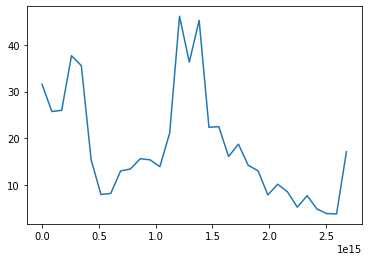

In [48]:
plt.plot(time, pm25.mean(axis=(1,2,3)))

In [ ]:
# aff = blue.rio.transform()
# type(aff)

In [ ]:
# aff

In [79]:
# blue = blue.rename({'width': 'longitude','height': 'latitude'})
# blue

In [80]:
# help(blue.rio.reproject)

In [81]:
# blue.rio.set_spatial_dims(x_dim='x', y_dim='y', inplace=True)
# blue.rio.crs

In [ ]:
# blue.rio.bounds()

In [83]:
# blue.rio.nodata

In [19]:
blue.rio.resolution()

(0.09999990463256836, -0.09999847412109375)

In [ ]:
# blue.rio.write_crs('EPSG:32634', inplace=True)

In [69]:
# # reproject
# blue.rio.reproject(dst_crs='EPSG:32634')

In [ ]:
# blue.rio.crs

In [87]:
# blue.rio.to_raster('/home/data/mydata/ACs/acolite/ACOLITE/S2A_MSI_2021_12_24_09_29_26_T34TEK_L2R.tif')